# Neural Network - Foundation of Deep Learning

## Abstract

This notebook will give you all you need to knwo about neural network and how it works. What are process behind it, why, and how it works together. from intuition and concept, then how its mathematically written, and then code to automatically the calculation or computation.

### Datasets

We will use `make_moons` dataset from sklearn. The reason is this datasets is binary labels and has non linear pattern, so logistic regression will failed, but mlp can.

### Importing Package

Cause we want to make it from scratch by our own, we will not using pytorch, tensorflow or other else. we going to just use numpy for array, matplotlib for visualization, and sklearn for datasets only.


In [2]:
# Impor library yang diperlukan
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import seaborn as sns

# Atur gaya plot untuk visualisasi yang lebih baik
sns.set_style("whitegrid")

---

## Section 1 : Why?

### Otak dan Komputer

Jadi, kenapa sih neural network (jaringan syaraf tiruan) dipake buat modeling? Nah, pertama kita harus paham dulu intuisinya, yang terinspirasi dari cara kerja otak manusia.

Di otak kita, ada yang namanya neuron. Tugasnya adalah nerima, ngolah, dan ngirim informasi. Nah, di komputer, kita bikin tiruannya. Namanya jaringan syaraf tiruan atau artificial neural network. Sama juga, dia bisa nerima input, ngolah, terus ngeluarin output. Jadi kayak otak versi digital.

Analogi Simpel - Main Bola

Misal kita mau mutusin main bola atau enggak.

Keputusan ini tergantung dari dua hal:
- Ada waktu atau enggak
- Cuacanya cerah atau enggak

Berarti input nya = waktu dan cuaca
Output nya = main bola atau enggak

Nah, dari kombinasi dua input ini, kita bisa bikin keputusan.
Misalnya:
- Nggak ada waktu dan ujan = ga main bola
- Ada waktu dan cerah = main bola

Ini semua terjadi di otak dengan neuronnya.

Di Komputer Gimana?

Sama aja. Kita masukin input (cuaca dan waktu) ke neuron buatan.
Lalu, kita kasih yang namanya bobot (weight).
Bobot ini kayak “nilai pentingnya” suatu input.
Misalnya:
- Cuaca cerah = penting → kasih bobot tinggi
- Waktu = penting juga → bobot tinggi

Tapi bedanya sama otak manusia adalah: kita udah tau aturannya, komputer belum.

Makanya, kita ajarin dia. Kita kasih bobot awal (biasanya random), lalu dia belajar sendiri supaya bisa ngerti kombinasi input yang bener-bener bikin output yang pas.

Proses Belajar = Training

Anggep aja proses ini kayak ngajarin anak kecil.

Contoh:

Anak kecil main hujan → eh sakit → dia belajar bahwa main hujan = gak enak
Besok-besok dia mikir dulu sebelum main hujan

Nah, komputer juga gitu.
Misalnya dia nebak:

Cuaca cerah dan ada waktu = output-nya "ga main bola"
Padahal realitanya kita main bola
Berarti dia salah → dia bakal perbaiki bobotnya dikit demi dikit.
Lama-lama dia makin pintar dan makin akurat. 

Analogi matematikanya:

2x = 2 → komputer coba tebak x-nya
Tebak 1 → hasilnya 2, oke
Tebak 1.5 → hasilnya 3, salah
Dicoba terus sampe dapet x yang bener yaitu 1

Lalu, Kenapa Butuh Bias & Fungsi Aktivasi?

Masalahnya, dunia nyata itu gak sesederhana matematika biasa.
Kadang:
- Cuaca cerah
- Ada waktu
Tapi tetep gak main bola

Lahh, kenapa?
Mungkin karena kita capek, atau waktunya cuma sebentar.

Nah, faktor-faktor tambahan kayak gitu yang bikin hubungan input–output itu gak selalu lurus (non-linear).
Makanya kita butuh dua hal:
1.	Bias → kayak “penyesuaian ekstra”, semacam faktor lain yang gak keliatan langsung dari input utama
2.	Fungsi Aktivasi → ini semacam “logika” yang bantu model mutusin, kayak ON/OFF switch. Bikin model lebih fleksibel dan bisa ngerti kondisi yang rumit


Jadi, walaupun awalnya model cuma belajar dari cuaca dan waktu, dia juga bisa ngerti kalo kadang cerah dan ada waktu pun belum tentu main bola.
Model bakal belajar dari semua data itu dan jadi makin pintar ngambil keputusan.

Okeyyy sampe sini, kita udah paham, kalo neural network itu kaya otak versi digital, bisa ngolah input(informasi) dan bikin keputusan (output), bedanya dia ga tau aturannya gimana, makanya ditimbang pake weight. Nah awalnya mungkin kopmuter masi salah nebak, tapi dia bakal belajar ddengan bandingin hasil dia dengan hasil sebenranya terus sampe bener. nah karena informasi  dari kondisi dunia ini rumit dan ga selalu liear, neural network butuh bias dan fungsi aktivasi untukb bikin keputusan yang lebih fleksibel dan realistis.


### Multi-Layer Perceptron - Neural Network Architecture

MLP itu adalah gabungan dari beberapa neuron. MLP itu otak versi digital, isinya neuron neuron. kasus kita ada di data make nnons, yang punya dua afitur atau input kelas dan 2 output kelas juga. kita bakal bikin layer layer di layer input, kita punya 2 node untuk ambil dan simpan 2 fitur data input tadi. anggap aja itu mata yang ngeliat koordinat x dan y dari gambar, tapi dia bener bener fokus ke satu itu aja dalam sekali proses. kemudain ada hidden layer, disini laah proses weight bias dan fungsi aktivasi itu dilakukan, artinya disinilah model belajar pola. kita pake 10 neuron, ini tuh hyperparameter. maksudnya adalah jumlahnya kita tentuin sendiri. terakhir adalah lapisan output, yang nentuin input tadi masuk ke kelas mana. 

analogi sederhananya, ada potongan gambar, kemudian kita disruh tebak ini tuh kira gambar kucing atau anjing. kita nebak dulu eh itu tuh kucing, proses nebaknya itu kan pake hipotesis, ohh ini warnanya kuning, dan ada ekornya. terus nanti kita cek, kalo itu ternya bukan kucing. nahh kita ulang prosesnya kita tebak lagi. cuman kali ini, kita ganti hipotesis kita, ekor dan warna oren itu berarti anjing. kalo di komputer mungkin dia butuh waktu untuk nangkep pola tapi overall prosesnya gitu. komputer liat input gambar, kasih bobot sebagai pola yang ditangkap, tebak output, evaluasi dengan bandingin sama yang asli, ulangi proses kalo salah sampee bener.

### Function Activation

Kenapa perlu fungsi aktivais lagi, padahal kaya tadi aja udah cukup. nahh. kalau kita cuma tumpuk neuron neuron tanpa fungsi aktivasi, hasilnya bakal tetep linear. 

Maksudnyaa?

Model kita cuma bisa gambar garis lurus buat pisahin kelas. Padahal, masalah kayak `make_moons` bentuknya nggak bisa dipisah dengan garis lurus.

Solusinya adalah kita butuh fungsi aktivasi non-linear.

Dia tuh yang bikin jaringan saraf bisa “melipat” ruang data, jadi bisa bikin batas keputusan yang melengkung atau kompleks. Ini tuh bakal mudah kali dipahami dengan grafik

Fungsi Sigmoid: Lembut dan Cocok Buat Klasifikasi

Untuk kasus ini, kita pakai Sigmoid, karena:
- Output-nya antara 0 sampai 1 → pas banget buat klasifikasi biner
- Halus dan bisa dihitung turunannya → penting buat proses belajar (backpropagation)

Rumusnya:

$$\sigma(z) = \frac{1}{1 + e^{-z}}$$

Intinya:
- Kalau input besar, output-nya mendekati 1.
- Kalau input kecil (negatif), output-nya mendekati 0.
- Jadi kita bisa baca output neuron sebagai probabilitas.

Tanpa fungsi aktivasi, jaringan saraf = cuma model linear.
Dengan aktivasi (kayak Sigmoid), jaringan jadi cerdas belajar pola rumit.



Misal kita lagi dikasih potongan gambar kecil, dan tugas kita adalah nebak: ini gambar kucing atau anjing?

Awalnya, kita tebak aja dulu. Misal: “Ini kucing deh!” Kenapa? Karena warnanya oranye dan ada ekornya. Tapi pas dicek ternyata salah — itu anjing. Nah, otak kita langsung mulai belajar dari kesalahan itu: “Oh, mungkin ekor + warna oranye gak selalu berarti kucing.”

Kita ulangi prosesnya. Kali ini, kita coba pakai pendekatan baru: “Oke, oranye dan ekor bisa jadi anjing juga kalau bentuk kupingnya begini.” Semakin banyak gambar yang kita lihat, semakin pintar otak kita dalam mengenali pola. Itulah yang dilakukan oleh komputer lewat neural network: melihat pola, menebak, membandingkan hasilnya dengan jawaban asli, lalu memperbaiki “cara berpikir”-nya.

Nah, di proses itu sebenarnya ada momen-momen keraguan. Misalnya kita lihat potongan gambar dengan ekor dan warna oranye — kita gak langsung yakin itu anjing atau kucing. Kita mikir: “Hmm, bisa jadi dua-duanya, tapi kayaknya kucing deh.”

Otak kita ngambil keputusan yang nggak mutlak — ada kemungkinan, ada persen-persen keyakinan.

Di sinilah fungsi aktivasi dibutuhkan.

Neural network awalnya cuma bisa bikin keputusan secara linear — kayak bilang: “Kalau warna > 0.5, berarti pasti kucing.” Tapi dunia nyata gak sesimpel itu. Polanya bisa rumit dan nggak selalu garis lurus.

Makanya kita butuh fungsi aktivasi: dia “membengkokkan” garis keputusan itu, supaya model bisa bikin keputusan yang lebih nyata, lebih fleksibel, lebih mirip cara kerja otak kita.

Contohnya, dibanding bilang “100% ini kucing”, model bisa bilang “Ini 73% kucing, 27% anjing”. Fungsi aktivasi membantu model untuk mengeluarkan tingkat keyakinan, bukan cuma jawaban hitam-putih.

Selain itu, fungsi aktivasi juga bikin model bisa belajar dari pola yang non-linear — contohnya: “Kalau warna oranye, ekor panjang, telinganya lancip, tapi bukan jenis bulu tertentu, maka itu baru kucing.”

Dengan fungsi aktivasi, model jadi bisa menangkap pola kompleks yang gak bisa ditangkap dengan pemetaan linear biasa.

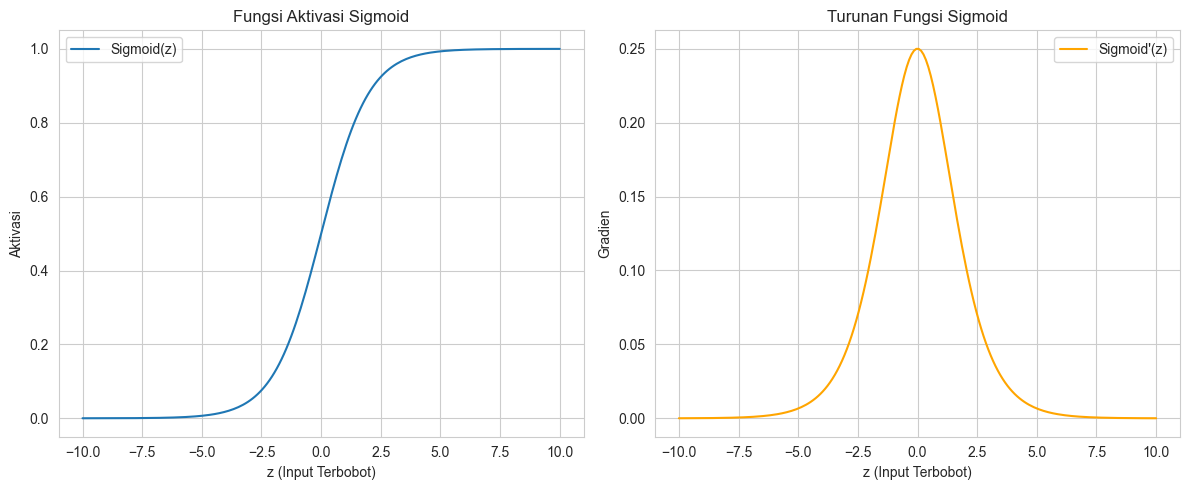

In [3]:
def sigmoid(z):
    """Fungsi aktivasi Sigmoid"""
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    """Turunan dari fungsi Sigmoid"""
    s = sigmoid(z)
    return s * (1 - s)

# Buat rentang nilai untuk diplot
z_vals = np.linspace(-10, 10, 200)
sigmoid_vals = sigmoid(z_vals)
sigmoid_deriv_vals = sigmoid_derivative(z_vals)

# Plot fungsi Sigmoid dan turunannya
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(z_vals, sigmoid_vals, label='Sigmoid(z)')
plt.title('Fungsi Aktivasi Sigmoid')
plt.xlabel('z (Input Terbobot)')
plt.ylabel('Aktivasi')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(z_vals, sigmoid_deriv_vals, label="Sigmoid'(z)", color='orange')
plt.title('Turunan Fungsi Sigmoid')
plt.xlabel('z (Input Terbobot)')
plt.ylabel('Gradien')
plt.legend()

plt.tight_layout()
plt.show()



Lihat grafik sebelah kiri. Ini adalah fungsi aktivasi sigmoid. Dia ambil input (nilai z dari hasil hitungan input × bobot + bias) dan hasilkan angka antara 0 sampai 1.

Jadi misalnya input kita = -10, sigmoid kasih output deket 0
- Kalau input kita = +10, sigmoid kasih output deket 1
- Kalau input kita = 0, sigmoid kasih output = 0.5 (netral)

Artinya: Sigmoid kasih “keyakinan” , seberapa besar kemungkinan hasilnya “positif”. Bukan 0% atau 100%, tapi bisa 73%, 24%, dll. Ini bikin model kita lebih fleksibel dan realistis.

Grafik Kanan – Turunan Sigmoid (Gradient)

Nah sekarang, lihat grafik sebelah kanan. Ini nunjukin seberapa curam fungsi sigmoid berubah di tiap titik z.
Kita sebut ini gradien atau turunan.

Intinya:
- Di sekitar z = 0, garisnya curam → gradien tinggi
- Di ujung kiri dan kanan (z jauh banget dari 0), garisnya datar → gradien hampir nol

Kenapa penting?
- Karena gradien ini yang dipakai buat ngupdate bobot saat training neural network.
- Kalau gradien besar → bobot diubah banyak → model belajar cepat
- Kalau gradien kecil → bobot berubah dikiiit banget → model belajar lambat

- Vanishing Gradient: Masalahnya di Sini

Bayangin kita terus-menerus dapet input yang hasilnya z = 8 atau z = -10.
Kalau dilihat dari grafik kanan, gradien di titik-titik itu mendekati nol.
Artinya, model jadi susah belajar karena bobotnya hampir gak berubah waktu di-update.

Ini disebut vanishing gradient

Gradient menghilang, pembelajaran jadi beku.

Tapi Tenang…

Untuk jaringan yang kecil atau sederhana seperti yang kita bikin di MLP ini, masalah ini belum jadi ancaman besar. Kita masih bisa pakai sigmoid dan hasilnya tetap oke. Tapi kalau kita nanti bikin neural network yang sangat dalam (banyak layer), baru ini bisa jadi masalah serius dan kita akan pakai fungsi lain seperti ReLU.

### Loss Function - How Fail



Balik ke contoh tadi kita lagi bikin sistem komputer yang bisa nebak gambar: kucing atau anjing. kita kasih 10 gambar, dan kita udah tahu mana kucing mana anjing (ini disebut label sebenarnya atau y).

Tapi karena komputernya masih belajar, dia cuma nebak apakah itu kucing atau anjing, hasil nebakannya itu kita sebut ŷ (y topi).

Nah, kadang tebakan komputernya benar, kadang salah. Makanya kita butuh ngukur seberapa salah tebakan komputer. Di situlah kita pakai rumus di atas: itu namanya Loss Function atau fungsi kerugian.

$$L = \frac{1}{m} \sum_{i=1}^{m} \frac{1}{2} (y^{(i)} - \hat{y}^{(i)})^2$$

Penjelasan Rumusnya:
- m = jumlah data (misal 10 gambar)
- yᶦ = label sebenarnya (misal: 1 = kucing, 0 = anjing)
- ŷᶦ = prediksi komputer dari gambar ke-i (misal: 0.73 artinya 73% yakin itu kucing)
- (yᶦ - ŷᶦ)² = seberapa jauh prediksi dari label aslinya (semakin jauh, semakin besar salahnya)
- ½ = dipakai biar pas diturunin (saat training) gampang diitung
- ∑ = kita jumlahin semua kesalahan dari semua gambar
- 1/m = kita bagi biar dapat rata-ratanya (jadi nggak bias ke jumlah data)

Okehhh.. Balik ke Contoh Tadi - Misal:

- Gambar 1: Kucing (y = 1), Komputer nebak 0.9 (ŷ = 0.9) → error kecil: (1 - 0.9)² = 0.01
- Gambar 2: Anjing (y = 0), Komputer nebak 0.7 (ŷ = 0.7) → error besar: (0 - 0.7)² = 0.49

Semakin banyak kesalahan kayak di gambar 2, semakin besar nilai Loss. Artinya, model kita masih jelek dan perlu dilatih lebih lanjut.

Kenapa Penting?

Karena komputer belajar dari kesalahan ini. Loss function itu kayak “rapor”-nya komputer. Semakin kecil nilainya, berarti komputer makin jago nebak gambar.

Dan nanti, dari loss ini kita bisa nurunin turunan (gradient) buat ngatur bobot-bobot di jaringan neuralnya. Jadi komputernya bisa belajar dari kesalahan dan jadi lebih pinter.

### Gradient Decent - Learn from Mistakes

Komputer sudah nebak gambar (kucing/anjing), terus kita hitung seberapa salah tebakan itu pakai loss function. Sekarang, pertanyaannya:

Gimana cara komputernya tahu harus ubah bobot ke arah yang bikin prediksinya makin bener?

Jawabannya: Gradient Descent.

Analogi Nyata: Menuruni Bukit

Bayangin kamu lagi berdiri di gunung berkabut. Tujuannya: turun ke dasar lembah (nilai loss terkecil = prediksi terbaik).
Tapi kamu nggak bisa lihat sekitar, jadi kamu:
1.	Ngerasain kemiringan tanah di bawah kakimu (gradien).
2.	Ngambil langkah kecil ke arah yang menurun.
3.	Ulangi terus sampai ketemu dataran (loss paling kecil).

Hubungannya ke Komputer:
- Gunung = bentuk fungsi loss. Tingginya = seberapa salah prediksi.
- Lokasi kamu = bobot dan bias yang sekarang.
- Gradien = petunjuk ke arah mana “turun” untuk mengurangi loss.
- Learning rate (η) = seberapa jauh kamu melangkah tiap kali.

Proses Belajar Komputer:

Setiap kali komputer nebak dan salah, dia:
1.	Hitung loss: seberapa salah nebak gambar?
2.	Hitung gradien: bobot mana yang nyumbang kesalahan itu?
3.	Perbarui bobot & bias: geser nilainya sedikit ke arah yang bikin loss-nya turun.

Contoh:

Komputer tadinya nebak 0.73 padahal jawabannya 1 → masih kurang yakin itu kucing.
Gradien kasih tahu: “ohh bobot bagian warna sama ekor kurang tinggi.”

→ Komputer naikin bobot itu dikit buat next prediksi lebih yakin ke arah kucing.

Hati-hati sama Learning Rate
- Terlalu kecil → langkahnya lambat banget, belajar jadi lama.
- Terlalu besar → lompat-lompat terus, bisa gagal ketemu solusi.

Makanya learning rate ini penting banget dan biasanya diatur manual (disebut hyperparameter).

Proses ini terus diulang:

Prediksi → hitung loss → hitung gradien → update bobot → ulangi.

Inilah inti dari “belajar” di neural network.

Dan… untuk langkah hitung gradiennya, nanti kita pakai algoritma khusus yang efisien: Backpropagation (akan kita bahas selanjutnya).